In [2]:
import mysql.connector
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import keyring

In [3]:
# Extablishing the db connection 
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password= keyring.get_password("Sorry_I_Will_Not_Show_My_Password", "root"),
  database = 'shopping'

)


In [4]:
# Validating if the connection is successful
if mydb.is_connected():
        db_Info = mydb.get_server_info()
        print("Connected to MySQL Server version ", db_Info)

Connected to MySQL Server version  8.0.28


In [5]:
# Initiating the cursor
mycursor = mydb.cursor(dictionary=True)

In [6]:
# Executing the required query
mycursor.execute('select * from reviews')

In [7]:
# Fetching the result back from the db
myresult = mycursor.fetchall()

In [8]:
# Outputting the result
myresult

[{'Review_ID': 3000,
  'Customer_ID': 1056,
  'Product_ID': 203,
  'Review_Text': 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
  'Rating': 3,
  'Title': 'Some major design flaws',
  'Review_Date': datetime.date(2022, 2, 20)},
 {'Review_ID': 3001,
  'Customer_ID': 1579,
  'Product_ID': 218,
  'Review_Text': "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",
  'Rating': 5,
  'Title': 'My favorite buy!',
  'Review_Date': datetime.date(2021, 5, 8)},
 {'Review_ID':

In [9]:
df = pd.DataFrame(myresult)

In [10]:
df

Review_ID  Customer_ID  Product_ID  \
0         3000         1056         203   
1         3001         1579         218   
2         3002         1195         224   
3         3003         1079         201   
4         3004         1307         212   
..         ...          ...         ...   
854       3992         1265         209   
855       3993         1515         207   
856       3994         1778         203   
857       3996         1516         216   
858       3997         1935         221   

                                           Review_Text  Rating  \
0    I had such high hopes for this dress and reall...       3   
1    I love, love, love this jumpsuit. it's fun, fl...       5   
2    This shirt is very flattering to all due to th...       5   
3    I love tracy reese dresses, but this one is no...       2   
4    I aded this in my basket at hte last mintue to...       5   
..                                                 ...     ...   
854  This top is cute and could be worn to work or ...       5   
855  I purchased the gorgeous green color. i love t...       5   
856  This is a beautiful sweater -- soft, lovely co...       5   
857  Like other reviewers i was hesitant to spend t...       5   
858  After reading the reviews, i ordered this dres...       5   

                       Title Review_Date  
0    Some major design flaws  2022-02-20  
1           My favorite buy!  2021-05-08  
2           Flattering shirt  2022-01-10  
3    Not for the very petite  2021-08-29  
4       Cagrcoal shimmer fun  2022-03-01  
..                       ...         ...  
854                Cute top!  2021-05-02  
855               Flattering  2021-10-27  
856              Bryson cowl  2021-06-30  
857     Amazing fit and wash  2022-01-24  
858  Elegant and comfortable  2021-05-25  

[859 rows x 7 columns]

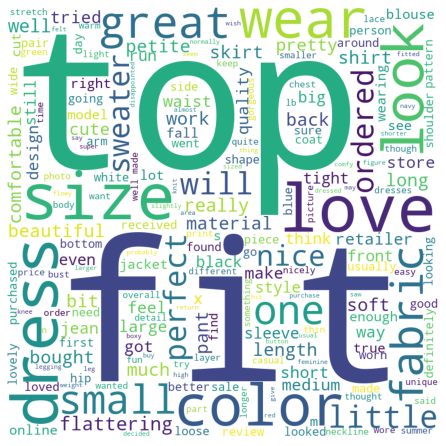

In [24]:
# Lets see what customers are most talking about
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10).generate(str(df['Review_Text'].values)) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 


In [12]:
# Executing the required query
mycursor.execute('select * from customer')

In [13]:
result = mycursor.fetchall()

In [14]:
df1 = pd.DataFrame(result)

In [15]:
df1

Customer_ID First_Name   Last_Name                         Email Gender  \
0           1001     Buiron     Hubbins            bhubbins0@ning.com      M   
1           1002       Greg       Porte            gporte1@zimbio.com      M   
2           1003   Mortimer  Pitcaithly  mpitcaithly2@tripadvisor.com      M   
3           1004     Wyatan        Widd                 wwidd3@cbc.ca      M   
4           1005     Lowell     Willans          lwillans4@dion.ne.jp      M   
..           ...        ...         ...                           ...    ...   
981         1996     Anabal       Lotze          alotzern@twitter.com      F   
982         1997       Iggy      Watsam              iwatsamro@va.gov      M   
983         1998      Tamas     Lamonby        tlamonbyrp@comsenz.com      M   
984         1999     Kendal      Huyton         khuytonrq@behance.net      M   
985         2000     Aylmer       Venus          avenusrr@godaddy.com      M   

                                 Password_enc     PhoneNo  \
0    de48ba59a0bf2d7bfb69856928803eddc80b6e48  9298534305   
1    de48ba59a0bf2d7bfb69856928803eddc80b6e48  5547730355   
2    de48ba59a0bf2d7bfb69856928803eddc80b6e48  2966067569   
3    de48ba59a0bf2d7bfb69856928803eddc80b6e48  2857966844   
4    de48ba59a0bf2d7bfb69856928803eddc80b6e48  6911775214   
..                                        ...         ...   
981  c242621ef3e7d623078ea89affa3e74abc31693b  5374575145   
982  c242621ef3e7d623078ea89affa3e74abc31693b  9057623762   
983  c242621ef3e7d623078ea89affa3e74abc31693b  8198785057   
984  c242621ef3e7d623078ea89affa3e74abc31693b  2812873762   
985  c242621ef3e7d623078ea89affa3e74abc31693b  6618778798   

           Shipping_Address Customer_Type  Deals_Utilized  Deals_Offered  
0       6 Westerfield Plaza       Regular              93            102  
1        770 Summit Parkway       Premium              86            110  
2          6873 Amoth Point       Regular              24            104  
3        423 Homewood Drive       Premium               3            108  
4     49307 Scoville Center       Regular              73            105  
..                      ...           ...             ...            ...  
981          7 Scott Street       Premium              96            104  
982          4 Elmside Lane       Regular             100            106  
983  74296 Transport Street       Regular              67            103  
984         6 Ruskin Circle       Premium              56            108  
985          57770 4th Lane       Premium              96            104  

[986 rows x 11 columns]

In [16]:
# Customer distribution across groups
x = df1['Customer_Type'].value_counts()

In [17]:
x

Premium    511
Regular    475
Name: Customer_Type, dtype: int64

In [18]:
import plotly.express as px

In [19]:
fig = px.bar(df1['Customer_Type'].value_counts())
fig.show()

In [20]:
df1.groupby('Customer_Type')[['Deals_Offered', 'Deals_Utilized']].sum()

Deals_Offered  Deals_Utilized
Customer_Type                               
Premium                53742           25806
Regular                50151           23780

In [21]:
fig = px.bar(df1.groupby('Customer_Type')[['Deals_Offered', 'Deals_Utilized']].sum())
fig.show()

In [22]:
# Executing the required query
mycursor.execute('select * from product')

In [23]:
product = mycursor.fetchall()

In [23]:
mycursor.execute('select * from click_stream')

In [24]:
click = mycursor.fetchall()

In [25]:
# Closing the curson and the connection
mycursor.close()
mydb.close()

In [26]:
from pymongo import MongoClient

In [27]:
#!pip install pymongo

In [28]:
# Establishing a db connection
client = MongoClient('localhost', 27017)

In [29]:
# Creating a database
mydb = client["e-commerce"]

In [30]:
# Accessing a collection
ds =mydb["click_stream"]

In [31]:
ds.insert_many(click)

In [32]:
print(client.list_database_names())

['admin', 'config', 'e-commerce', 'local']


In [33]:
# Customers with maximum time spent on the website (top 10)
pipeline = [
  { "$group": {"_id": "$Customer_ID", "value": { "$avg": "$Time_Spent" } } },
  { "$sort" : {"value" : -1 } },
  { "$limit": 10 }
]

cursor = ds.aggregate(pipeline)

In [34]:
for i in cursor:
    print(i)

{'_id': 1673, 'value': 497.0}
{'_id': 1785, 'value': 497.0}
{'_id': 1471, 'value': 494.0}
{'_id': 1322, 'value': 494.0}
{'_id': 1407, 'value': 492.0}
{'_id': 1334, 'value': 492.0}
{'_id': 1611, 'value': 491.0}
{'_id': 1245, 'value': 490.0}
{'_id': 1795, 'value': 489.0}
{'_id': 1131, 'value': 489.0}


In [35]:
# Find the customers who surfed more than 9 pages in a session and had more than 450 clicks
myquery = { "No_of_pages": { "$gt": 9 }, 
            "No_of_Clicks" : { "$gt": 450}
          
          }

In [36]:
mydoc = ds.find(myquery)

In [37]:
for i in mydoc:
    print(i)

{'_id': ObjectId('6260b119dfd857023bd30c84'), 'Event_ID': 7087, 'Customer_ID': 1235, 'No_of_pages': 10, 'No_of_Clicks': 459, 'Time_Spent': 430}
{'_id': ObjectId('6260b119dfd857023bd30cd2'), 'Event_ID': 7167, 'Customer_ID': 1531, 'No_of_pages': 10, 'No_of_Clicks': 477, 'Time_Spent': 103}
{'_id': ObjectId('6260b119dfd857023bd30d0a'), 'Event_ID': 7223, 'Customer_ID': 1517, 'No_of_pages': 10, 'No_of_Clicks': 468, 'Time_Spent': 5}
{'_id': ObjectId('6260b119dfd857023bd30d4c'), 'Event_ID': 7290, 'Customer_ID': 1342, 'No_of_pages': 10, 'No_of_Clicks': 463, 'Time_Spent': 346}
{'_id': ObjectId('6260b119dfd857023bd30d98'), 'Event_ID': 7367, 'Customer_ID': 1316, 'No_of_pages': 10, 'No_of_Clicks': 462, 'Time_Spent': 116}
{'_id': ObjectId('6260b119dfd857023bd30db5'), 'Event_ID': 7396, 'Customer_ID': 1887, 'No_of_pages': 10, 'No_of_Clicks': 468, 'Time_Spent': 409}
{'_id': ObjectId('6260b119dfd857023bd30dbe'), 'Event_ID': 7405, 'Customer_ID': 1461, 'No_of_pages': 10, 'No_of_Clicks': 487, 'Time_Spent':

In [38]:
# Accessing a collection
da =mydb["product"]

In [39]:
da.insert_many(product)

In [40]:
# Find the product with highest selling price
da.find_one(sort=[("Selling_Price", -1)])

{'_id': ObjectId('6260b119dfd857023bd31011'),
 'Product_ID': 207,
 'Category_ID': 456,
 'SKU_ID': 2117,
 'P_Name': 'Blouson Dress',
 'Ranking': 4,
 'Selling_Price': 2964.0,
 'Discount': 19.0,
 'P_Description': 'Loss control mv-pers NOS',
 'In_Stock': 'No',
 'Size': 'L',
 'Colors': 'Orange'}

In [41]:
# Find the products which are not in stock and price greater than 500 dollars
myquery = { "In_Stock": { "$ne": "Yes" }, 
            "Selling_Price" : { "$gt": 500}
          
          }

In [42]:
mydoc = da.find(myquery)

In [43]:
for i in mydoc:
    print(i)

{'_id': ObjectId('6260b119dfd857023bd3100d'), 'Product_ID': 203, 'Category_ID': 101, 'SKU_ID': 4172, 'P_Name': 'Baby Doll Dress', 'Ranking': 37, 'Selling_Price': 1106.0, 'Discount': 32.0, 'P_Description': 'Disc dis NEC/NOS-lumbar', 'In_Stock': 'No', 'Size': 'M', 'Colors': 'Aquamarine'}
{'_id': ObjectId('6260b119dfd857023bd31011'), 'Product_ID': 207, 'Category_ID': 456, 'SKU_ID': 2117, 'P_Name': 'Blouson Dress', 'Ranking': 4, 'Selling_Price': 2964.0, 'Discount': 19.0, 'P_Description': 'Loss control mv-pers NOS', 'In_Stock': 'No', 'Size': 'L', 'Colors': 'Orange'}
{'_id': ObjectId('6260b119dfd857023bd31013'), 'Product_ID': 209, 'Category_ID': 456, 'SKU_ID': 3221, 'P_Name': 'Camisole Dress', 'Ranking': 45, 'Selling_Price': 1615.0, 'Discount': 24.0, 'P_Description': 'Trans arthropathy-mult', 'In_Stock': 'No', 'Size': 'S', 'Colors': 'Yellow'}
{'_id': ObjectId('6260b119dfd857023bd31016'), 'Product_ID': 212, 'Category_ID': 456, 'SKU_ID': 2489, 'P_Name': 'Denim Dress', 'Ranking': 4, 'Selling_Pr